Figure in the main Article

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Importing the libraries

In [2]:
import numpy as np
from matplotlib.ticker import (MultipleLocator,  AutoMinorLocator, ScalarFormatter)
import matplotlib as mlt
import matplotlib.pyplot as plt
plt.rc('axes', linewidth=2)
plt.rcParams['font.size'] = '20'
import joblib as jb
from my_functions import S2, S3, S4, S5, s_transfer, S6, S7
from matplotlib import gridspec


Importing the data

In [3]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')
main_headers = all_data.keys()
# print("Main Headers: Simulations")
# for header in main_headers:
#    print(header)

<span style="font-size:40px;">Figure 2</span> (currently: Fig2 and Fig3)

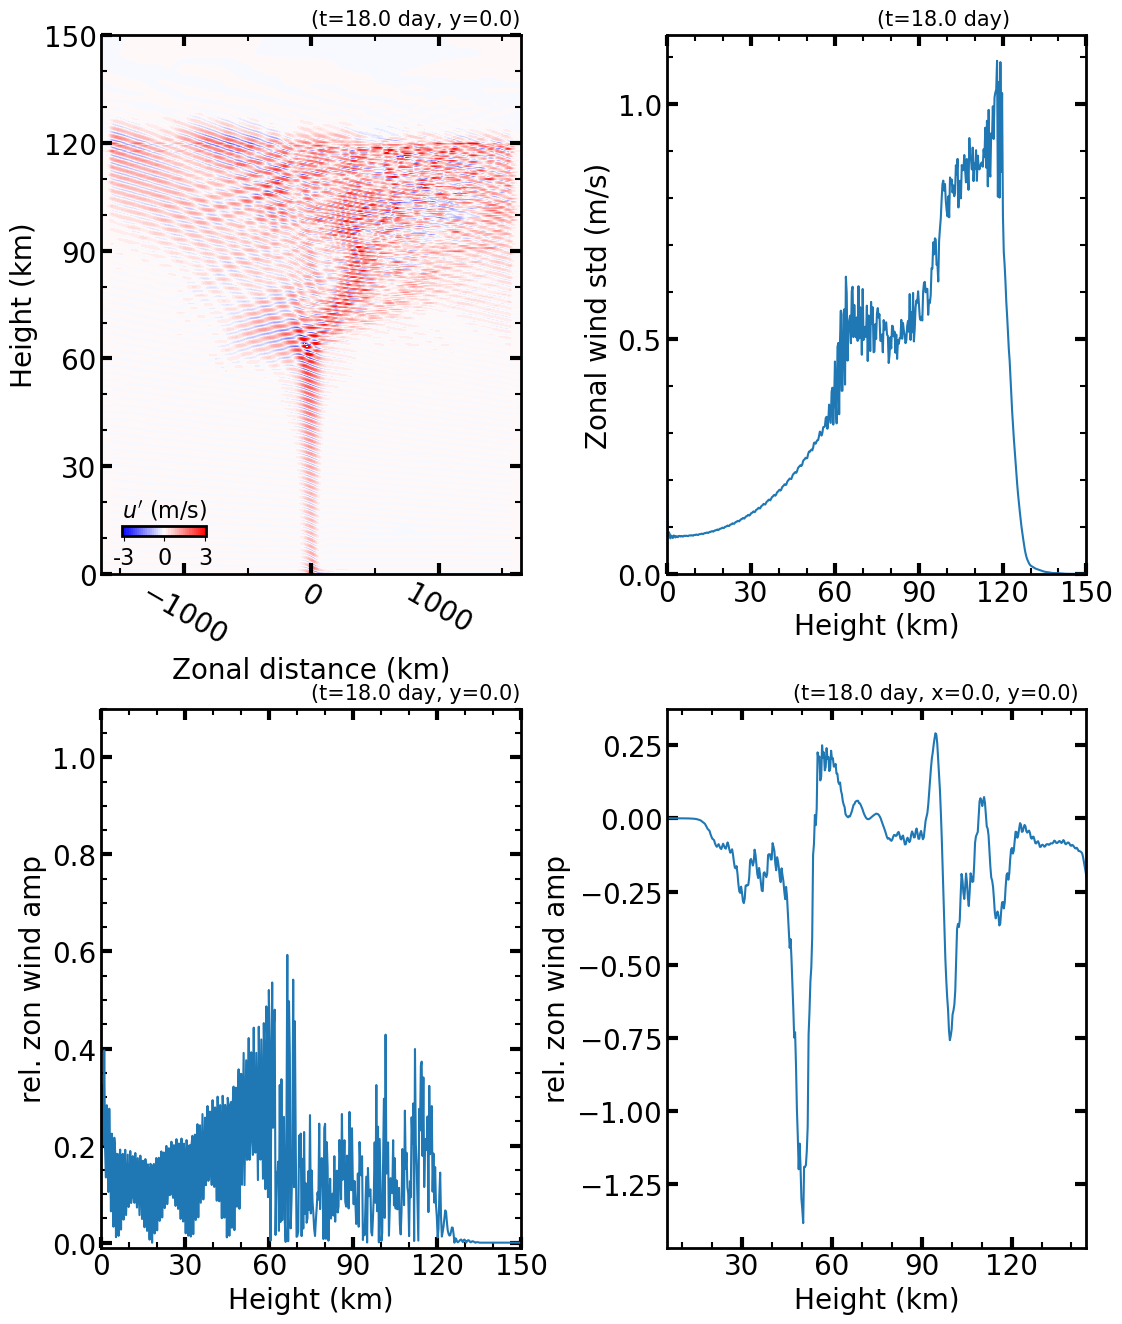

In [4]:

iname = 'B5vvlow'

all_data5 = jb.load('../data/FigS5.pkl') # wave drag! might change when I can calculate directly 
data5 = all_data5[iname]
a_x = data5['a_x']

data = all_data[iname]
lon = data['lon']
height = data['height'][:,1]
time = data['time']
u = data['u(t,z,0,lon)']
m_u = data['m_u(t,z)']
std_u = data['std_up(z)']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=2.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.25)

######## zonal wind cross-section
ax = axes[0,0]
S2(lon, time, height, u, m_u, fig, ax)
ax.set(xlabel='Zonal distance (km)', ylabel='Height (km)')

######## standard deviation profiles
ax = axes[0,1]
S3(time,height,std_u.data,ax)    
ax.set(ylabel='Zonal wind std (m/s)', xlabel='Height (km)')

######## relative fluctuations
ax = axes[1,0]
lon_m = int(len(data['lon'])/2)+1
u0 = data['u(t,z,0,lon)'][:,lon_m]
S4(lon, time, height, u0, m_u, ax)
ax.set(ylabel='rel. zon wind amp', xlabel='Height (km)')

######## wave drag profiles
ax = axes[1,1]
lon_m = int(len(data['lon'])/2)+1
S5(time, height, a_x, ax)
ax.set(ylabel='rel. zon wind amp', xlabel='Height (km)')

plt.show()

<span style="font-size:40px;">Figure 6</span> (currently: Fig6)

[Text(597.8699494949494, 0.5, 'rel. zon wind amp'),
 Text(0.5, 33.7222222222222, 'Height (km)')]

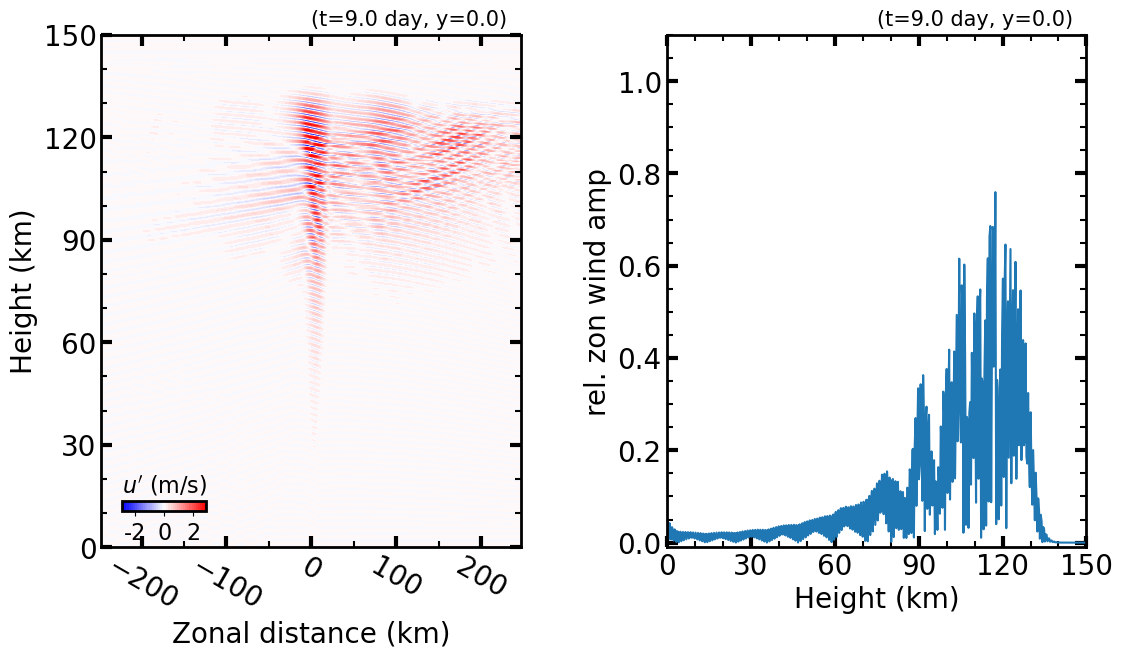

In [5]:
iname = 'B2mid'
data = all_data[iname]
lon = data['lon']
height = data['height'][:,1]
time = data['time']
u0 = data['u(t,z,0,lon)']
m_u = data['m_u(t,z)']
std_u = data['std_up(z)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
fig.tight_layout(pad=2.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.25)
######## zonal wind cross-section
ax = axes[0]
S2(lon, time, height, u0, m_u, fig, ax)
ax.set(xlabel='Zonal distance (km)', ylabel='Height (km)')

######## relative fluctuations
ax = axes[1]
lon_m = int(len(data['lon'])/2)+1
u0 = data['u(t,z,0,lon)'][:,lon_m]
S4(lon, time, height, u0, m_u, ax)
ax.set(ylabel='rel. zon wind amp', xlabel='Height (km)')


# plt.savefig('../article_figs/figure6_B2mid.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/figure6_B2mid.png', bbox_inches='tight', dpi=50)

<span style="font-size:40px;">Figure 7</span> (currently: Fig7)

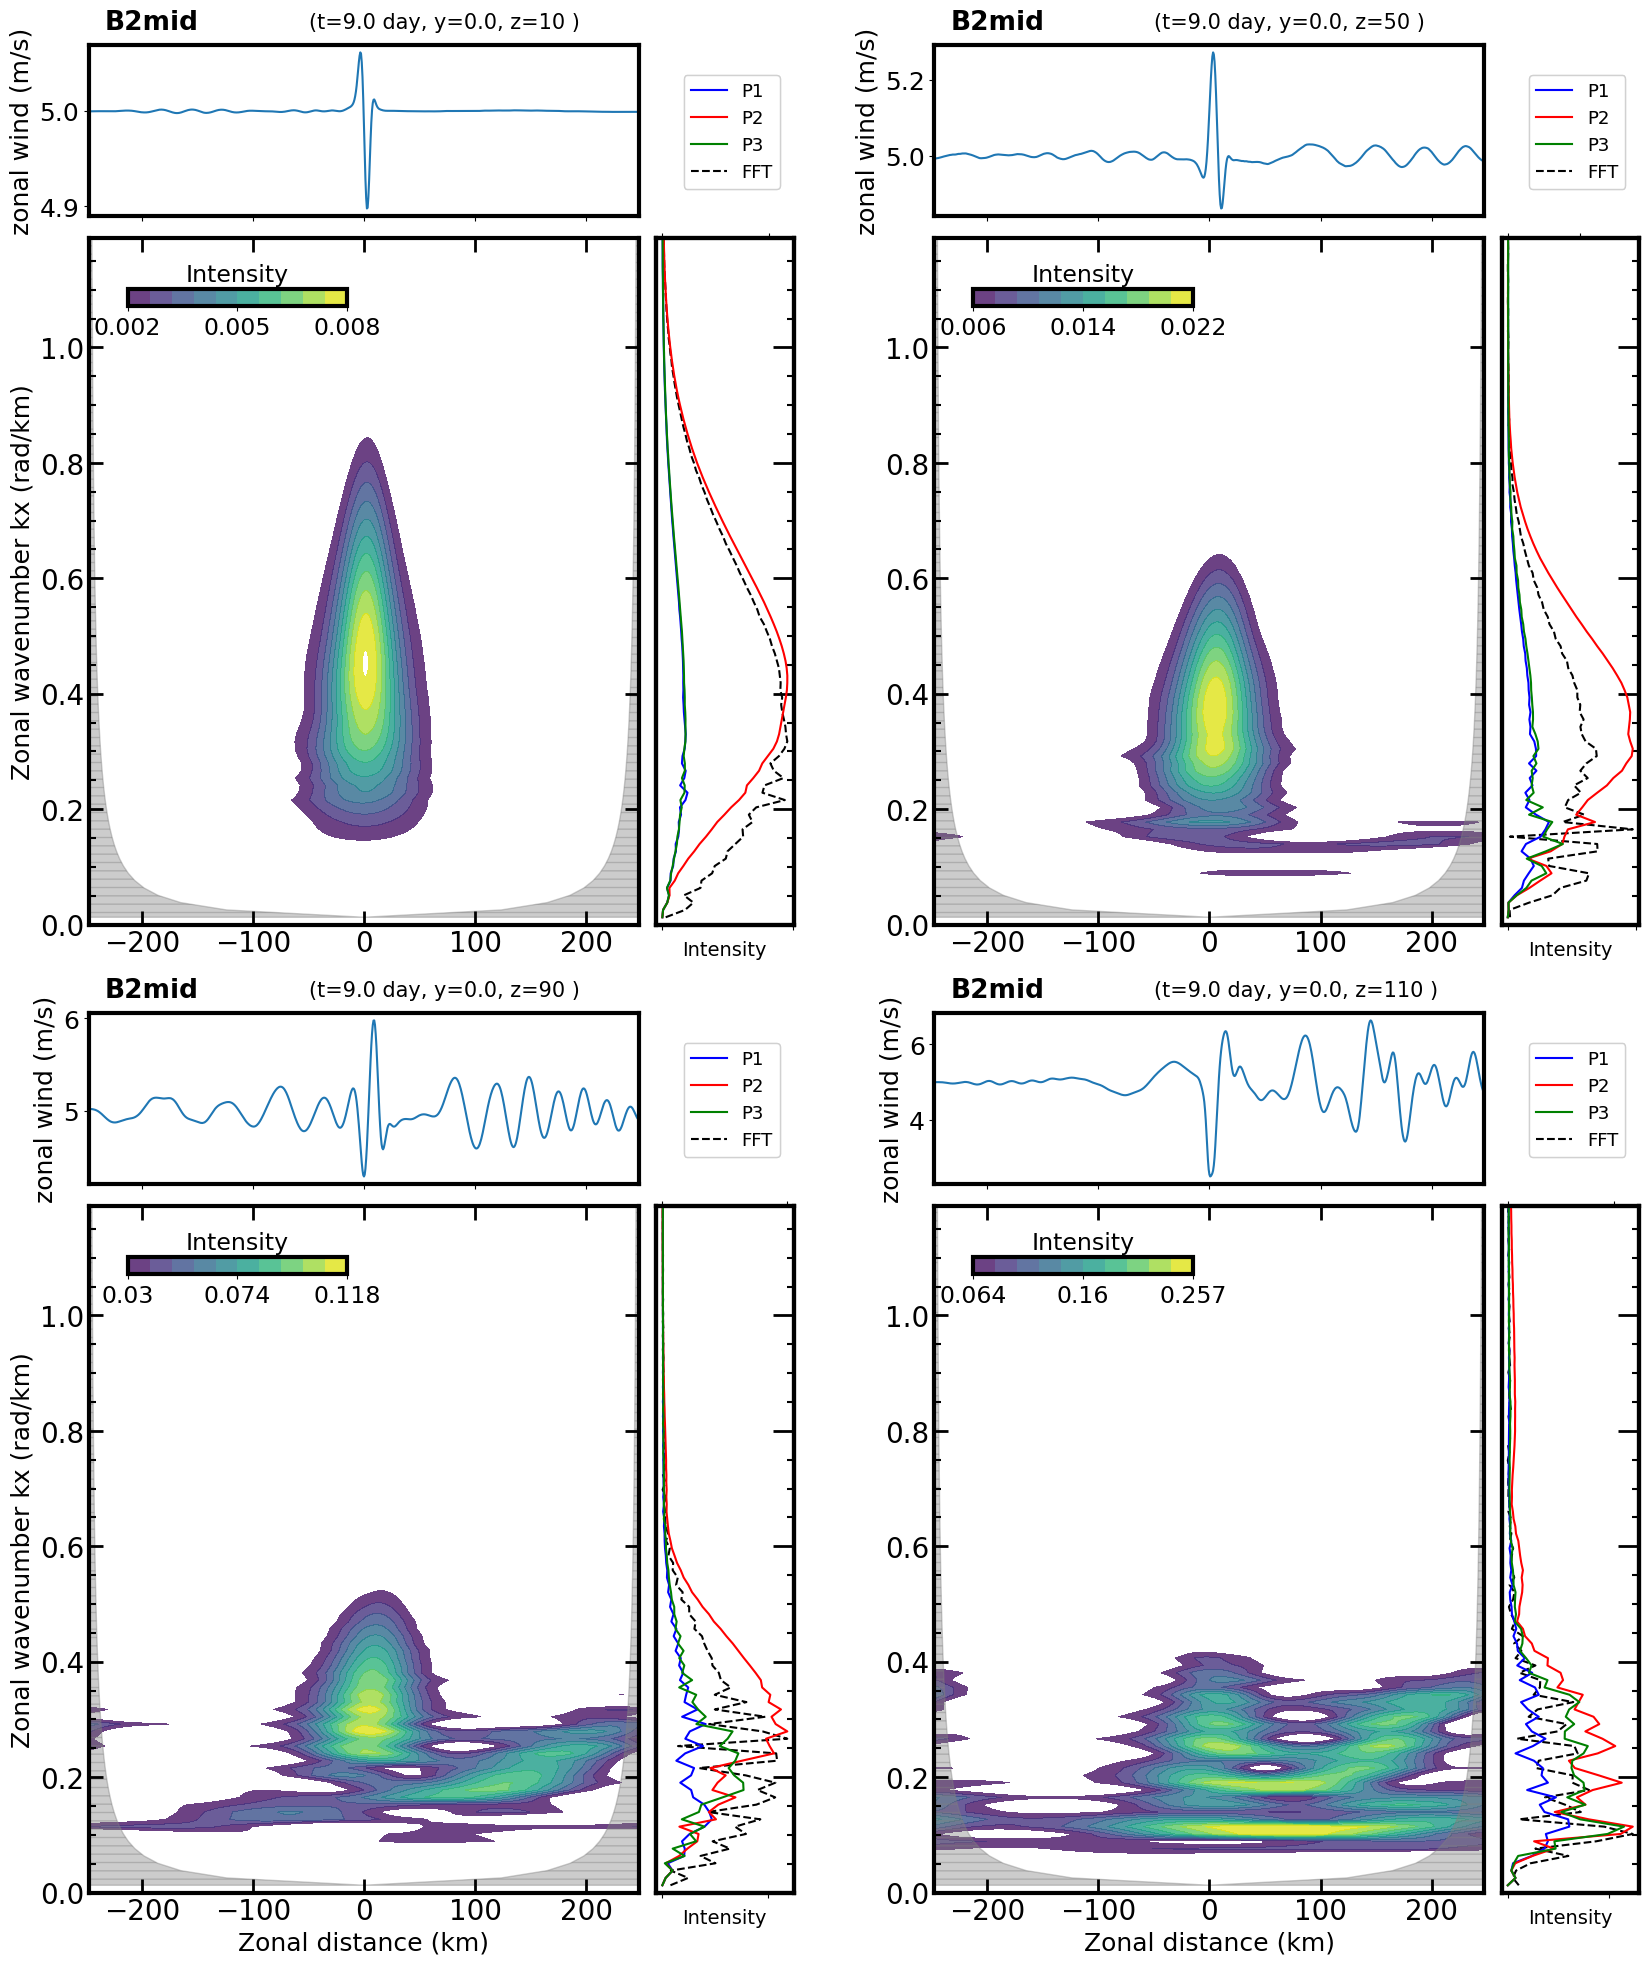

In [6]:
u0 = data['u(t,z,0,lon)']
dx = abs(lon[0] - lon[1]) * 110
rows, cols = 2, 2
fig = plt.figure(figsize=(20, 24))  # Adjust aspect ratio
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.1)
################### S1, z=10 km
index = np.argmin(np.abs(height - 10.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[0, 0],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(ylabel='Zonal wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=50 km
index = np.argmin(np.abs(height - 50.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[0, 1],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=90 km
index = np.argmin(np.abs(height - 90.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[1, 0],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Zonal distance (km)', ylabel='Zonal wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=110 km
index = np.argmin(np.abs(height - 110.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[1, 1],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Zonal distance (km)')
axu.set_ylabel('zonal wind (m/s)')

plt.show()

<span style="font-size:40px;">Figure 9</span> (currently: Fig9)

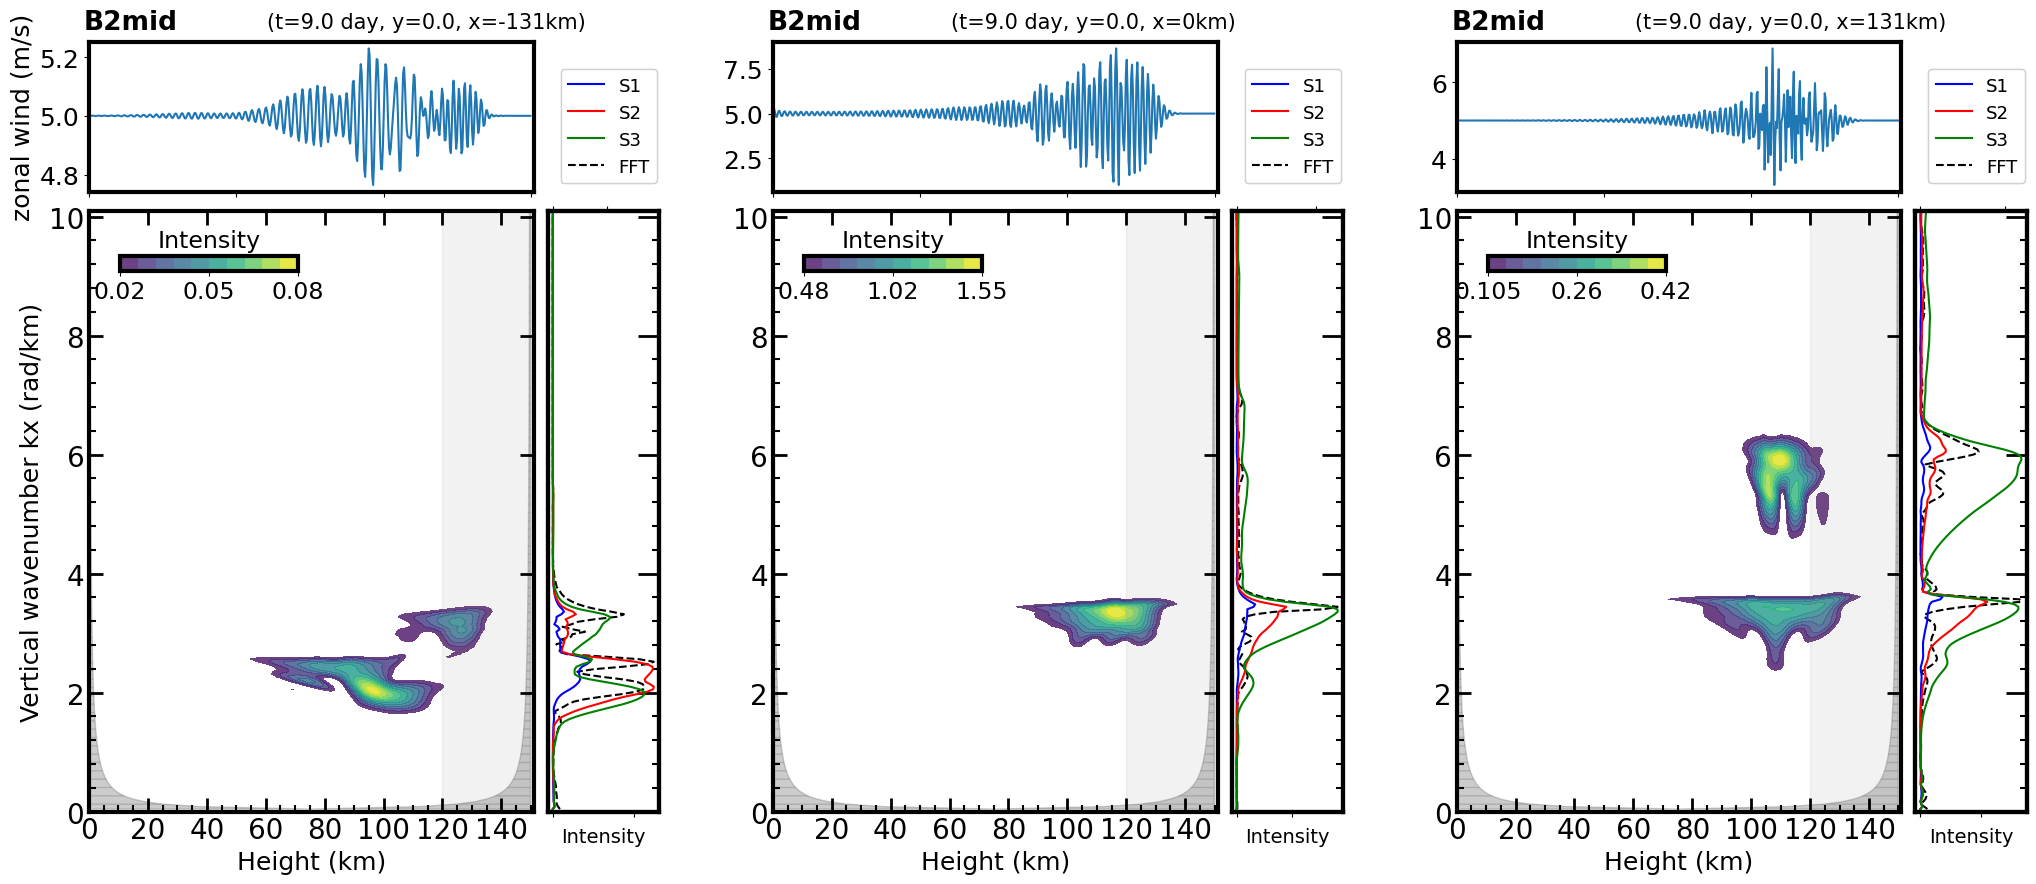

In [7]:
lon0 = int(len(lon)/2)
rows, cols = 1, 3
dz = abs(height[0] - height[1]) 
fig = plt.figure(figsize=(25, 10))  # Adjust aspect ratio
fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically
######################## P1
index_l = lon0-199
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[0],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)', ylabel='Vertical wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
######################## P2
index_l = lon0
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[1],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)')
######################## P3
index_l = lon0+199
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[2],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)')

plt.show()